<u> Data source: https://www.kaggle.com/datasets/sveta151/tiktok-popular-songs-2022 </u>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('TikTok_songs_2022.csv')

In [3]:
data.head(5).append(data.tail(5))

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720000,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342000,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.350000,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.440000,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.099500,0.000000,0.3350,0.722,108.966,4,191822
258,The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,4,216320
259,Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,3,233720
260,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365
261,Good Looking,Suki Waterhouse,64,Good Looking,80,0.377,0.558,-9.076,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,3,214800
262,INFERNO,Sub Urban,67,INFERNO,71,0.820,0.611,-5.020,0,9,0.1220,0.076600,0.000025,0.0684,0.637,127.883,4,133134


In [4]:
X = data['artist_pop']
y = data['track_pop']

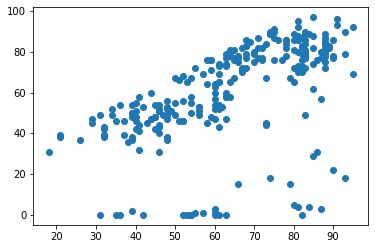

In [5]:
plt.scatter(X, y)

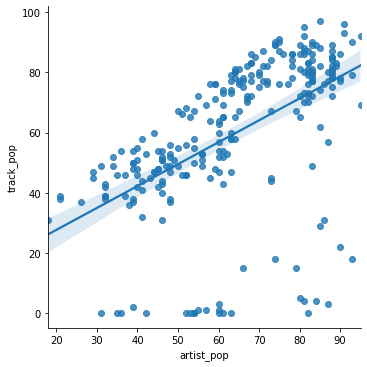

In [6]:
sns.lmplot(x='artist_pop', y='track_pop', data=data)

In [7]:
num_cols = [col for col in data.select_dtypes(exclude='object')]

In [8]:
X = data[num_cols].copy()
X.drop('track_pop', axis=1, inplace=True)
y = data['track_pop']

In [9]:
model = LinearRegression().fit(X, y)

In [10]:
model.coef_

array([ 6.89920222e-01, -2.13397350e+01,  9.40743151e+00,  4.11698107e-01,
        4.64847050e-02, -9.39153974e-01, -7.12167219e+00,  4.66850521e+00,
       -8.87491093e+00, -8.11324096e+00,  5.96460191e+00, -1.28524560e-02,
        7.20128823e+00,  1.72021637e-05])

In [11]:
model.score(X, y)

0.32219857204533386

In [12]:
X = np.asarray(data['artist_pop'])
y = data['track_pop']

In [13]:
model = LinearRegression().fit(X.reshape(-1, 1), y)

In [14]:
model.coef_

array([0.72772484])

In [15]:
model.score(X.reshape(-1, 1), y)

0.2795428557863665

<AxesSubplot:>

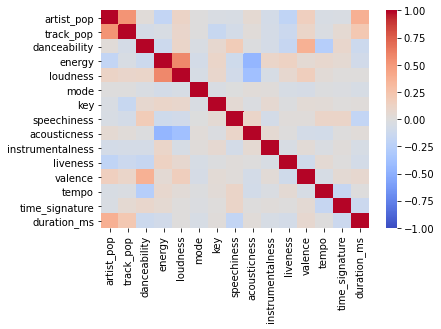

In [16]:
sns.heatmap(data[num_cols].corr(), vmin = -1, vmax = +1, cmap = 'coolwarm')

In [17]:
X = data[['artist_pop', 'duration_ms']]
y = data['track_pop']

In [18]:
model = LinearRegression().fit(X, y)

In [19]:
model.coef_

array([7.13043064e-01, 2.01328676e-05])

In [20]:
model.score(X, y)

0.28021527693610204

In [21]:
data.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,64.186312,59.844106,0.715338,0.682631,-6.300513,0.536122,5.809886,0.117268,0.193188,0.020244,0.202562,0.506149,122.883696,3.969582,174656.212928
std,18.146338,24.976524,0.117722,0.141756,1.905114,0.499644,3.657312,0.101417,0.214588,0.109370,0.151808,0.220757,24.396686,0.288168,34785.125564
min,18.000000,0.000000,0.308000,0.214000,-13.468000,0.000000,0.000000,0.025200,0.000038,0.000000,0.026500,0.036300,62.948000,1.000000,85742.000000
25%,50.000000,47.000000,0.646000,0.593000,-7.423500,0.000000,2.000000,0.044750,0.028100,0.000000,0.094350,0.349000,106.850500,4.000000,148646.000000
50%,64.000000,66.000000,0.726000,0.701000,-6.067000,1.000000,6.000000,0.070700,0.120000,0.000003,0.132000,0.485000,123.056000,4.000000,171028.000000
75%,81.000000,79.500000,0.796500,0.790500,-4.887000,1.000000,9.000000,0.156000,0.298500,0.000334,0.277500,0.680000,130.004500,4.000000,199047.000000
max,95.000000,97.000000,0.961000,0.955000,-2.634000,1.000000,11.000000,0.481000,0.965000,0.939000,0.790000,0.956000,187.906000,5.000000,298933.000000


In [22]:
data_v1 = data[data['track_pop'] > 29]
X = np.asarray(data_v1['artist_pop']).reshape(-1, 1)
y = data_v1['track_pop']

In [23]:
model = LinearRegression().fit(X, y)

In [24]:
model.coef_

array([0.7532509])

In [25]:
model.score(X, y)

0.6521285056170958

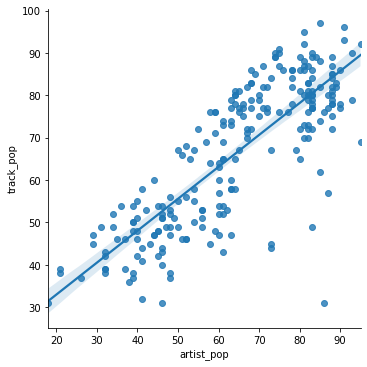

In [26]:
sns.lmplot(x='artist_pop', y='track_pop', data=data_v1)

<AxesSubplot:>

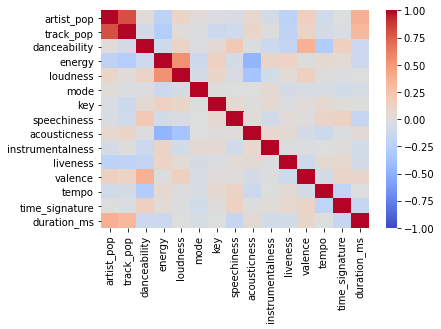

In [27]:
sns.heatmap(data_v1[num_cols].corr(), vmin = -1, vmax = +1, cmap = 'coolwarm')

In [28]:
data_v1[num_cols].corr()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
artist_pop,1.000000,0.807545,0.025187,-0.216590,0.101740,0.027727,-0.027599,-0.033717,0.073100,-0.054756,-0.226010,0.160430,-0.090725,-0.000425,0.379972
track_pop,0.807545,1.000000,-0.064016,-0.265722,0.028930,-0.018920,-0.117666,-0.100431,0.108871,0.001293,-0.209075,0.119015,-0.065148,-0.028004,0.334156
danceability,0.025187,-0.064016,1.000000,-0.114722,0.113455,-0.022740,0.058470,0.211776,-0.012056,-0.125105,-0.178253,0.372649,-0.280254,0.153480,-0.125004
energy,-0.216590,-0.265722,-0.114722,1.000000,0.546673,-0.122227,0.142934,-0.073382,-0.461785,0.114722,0.126444,0.005799,0.066335,0.041106,-0.132099
loudness,0.101740,0.028930,0.113455,0.546673,1.000000,-0.056595,0.103383,-0.032035,-0.352341,-0.085931,0.040996,0.151900,0.005204,-0.009212,-0.007038
mode,0.027727,-0.018920,-0.022740,-0.122227,-0.056595,1.000000,0.005046,-0.004937,-0.007322,0.059618,-0.059482,-0.045411,-0.044835,-0.083764,-0.053187
key,-0.027599,-0.117666,0.058470,0.142934,0.103383,0.005046,1.000000,0.068875,0.012324,0.055360,-0.019175,0.025993,0.070151,0.011669,-0.002076
speechiness,-0.033717,-0.100431,0.211776,-0.073382,-0.032035,-0.004937,0.068875,1.000000,0.029027,-0.092154,0.037175,0.009731,0.114698,0.138891,-0.162677
acousticness,0.073100,0.108871,-0.012056,-0.461785,-0.352341,-0.007322,0.012324,0.029027,1.000000,0.079261,0.047400,-0.068987,-0.121662,-0.013998,0.051043
instrumentalness,-0.054756,0.001293,-0.125105,0.114722,-0.085931,0.059618,0.055360,-0.092154,0.079261,1.000000,-0.009074,-0.008924,-0.000404,0.016074,-0.080597
